

# Project: Investigate a Dataset - Movies Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I have chosen for this project is The Movies Database(TMDB) from kaggle. It provides data about approximately 11,000 movies from 1960 to 2015. We can derive insights about profitable movies, profitable production companies, popularity of movies, popular genres etc.

The questions I will be answering from this dataset are as follows:

1. What is the correlation between popularity, revenue and budget ?
2. What are the top 10 movies in terms of revenue ?
3. Which movie genre is made more often?
4. Which movie genre is popular? 
5. Which Production companies produced the highest-grossing movies ?
6. Which production companies produced more movies?

In [2]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

1. Load the data.

2. Check the dataset for cleanliness,

3. Trim and clean the dataset for analysis


In [8]:
# Load the data and print out a few lines. 
df= pd.read_csv("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Inspect the dataset to understand its structure and find any errant data



In [9]:
df.shape

(10866, 21)

#### The movies dataset has 10,866 rows and 21 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### We understand that there are some columns that will not be useful in our analysis.
#### There are also null values present in some of the columns.


In [11]:
# We can remove the following columns : # 'id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'.

df.drop(['id','imdb_id','homepage','tagline', 'keywords','overview'],axis=1,inplace=True)

In [12]:
# confirm if the columns are removed
df.columns


Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### The unwanted columns have been removed

In [13]:
# check datatypes of columns

df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

####  The datatype of release_date needs to be changed from 'string' to 'datetime' format

In [14]:
# Convert datatype of 'release_date' 

df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

# Check if the datatype is changed successfully.
df['release_date'].dtypes

dtype('<M8[ns]')

In [15]:
# view the number of missing values in all the columns
df.isnull().sum() 

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
# find 0 values in columns
df.isin([0]).sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [17]:
# Replace '0' values with NaN

cols = ["budget","revenue","budget_adj","revenue_adj"]
df[cols] = df[cols].replace(0,np.nan)
# Confirm the 0 values have been replaced in the above columns
df.isin([0]).sum()

popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
runtime                 31
genres                   0
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [ ]:
# Replace Nan Values in the budget and revenue columns with the mean of respective columns

In [18]:
#function to fill Nan values with mean.

def fillNaN_mean():
    for i in cols :
        print('column:',i)
        cal_mean = df[i].mean()
        print('mean:',cal_mean)
        df[i].fillna(cal_mean,inplace=True)
        print("filled in", i)
fillNaN_mean()    
    

column: budget
mean: 30739432.899226304
filled in budget
column: revenue
mean: 89220658.32474227
filled in revenue
column: budget_adj
mean: 36887736.69545232
filled in budget_adj
column: revenue_adj
mean: 115077354.86800507
filled in revenue_adj


In [19]:
# drop rows with Null values
df.dropna(inplace=True)
df.shape

(9773, 15)

In [20]:
# check duplicates
(df.duplicated()).value_counts()

False    9772
True        1
dtype: int64

In [21]:
# drop duplicate row
df.drop_duplicates(inplace=True)
df.shape

(9772, 15)

In [22]:
# confirm if rows with null values are removed

df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### The dataset has been cleaned of errant datatypes, null values, 0 values and stripped of unwanted columns. 

<a id='eda'></a>
## Exploratory Data Analysis


In [23]:
# Statistics from the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,3.112472e+07,9.008325e+07,102.926627,239.312014,5.963528,2000.878428,3.735026e+07,1.161933e+08
std,1.036931,2.810591e+07,1.138428e+08,27.877432,603.011504,0.913174,13.036794,3.025797e+07,1.396302e+08
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.232710,1.700000e+07,3.526309e+07,90.000000,18.000000,5.400000,1994.000000,2.267041e+07,4.908911e+07
50%,0.419762,3.073943e+07,8.922066e+07,100.000000,46.000000,6.000000,2005.000000,3.688774e+07,1.150774e+08
75%,0.776408,3.073943e+07,8.922066e+07,112.000000,173.000000,6.600000,2011.000000,3.688774e+07,1.150774e+08
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
print(df['release_year'].min())
print(df['release_year'].max())

1960
2015


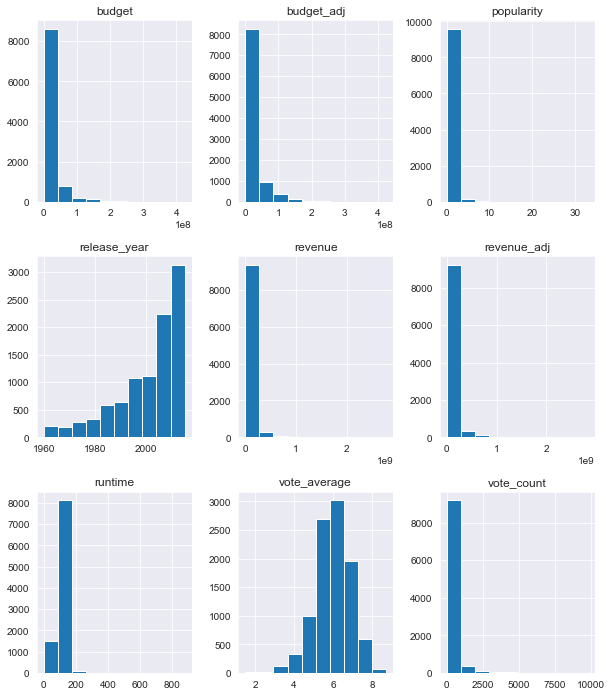

In [25]:
df.hist(figsize=(10,12));

#### The histogram shows the trends of various aspects of the movies.


### Research Question 1 : What is the correlation between popularity, revenue and budget ?

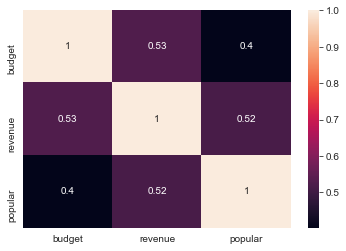

In [26]:
# Correlation between budget, revenue and popularity

df_popular = pd.DataFrame(df,columns=['budget_adj','revenue_adj','popularity'])

cor = df_popular.corr()

x_axis_labels = ['budget','revenue','popular',] 
y_axis_labels = ['budget','revenue','popular'] 
sns.heatmap(cor, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

#### Observation:
#### There is some positive correlation between budget and popularity.
#### There is some positive correlation between budget and revenue.
#### Revenue has more positive correlation to buget than that of popularity.

### Research Question 2 : What are the top 10 movies in terms of revenue ?

In [27]:
# Get the top 10 movies in terms of revenue
df_top10 = df.nlargest(10, ['revenue_adj'])
movies = df_top10['original_title'].to_list()
revenue =  df_top10['revenue_adj'].to_list()

In [28]:
print(movies)
print(revenue)

['Avatar', 'Star Wars', 'Titanic', 'The Exorcist', 'Jaws', 'Star Wars: The Force Awakens', 'E.T. the Extra-Terrestrial', 'The Net', 'One Hundred and One Dalmatians', 'The Avengers']
[2827123750.41189, 2789712242.27745, 2506405735.41947, 2167324901.19974, 1907005841.91576, 1902723129.80182, 1791694309.24878, 1583049536.3524199, 1574814739.70476, 1443191435.20607]


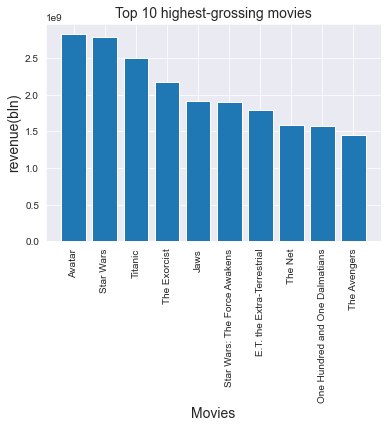

In [29]:
ypos =np.arange(len(movies))
plt.xticks(ypos,movies,rotation='vertical')
plt.ylabel('revenue(bln)',fontsize = 14)
plt.xlabel('Movies', fontsize = 14)
plt.title('Top 10 highest-grossing movies',fontsize = 14)
plt.bar(ypos,revenue);

### Observation

Avatar tops the list of highest grossing movies, followed by Star Wars and Titanic. The other high-grossers are also shown.

Since the inflation adjusted column for revenue -'revenue_adj' is used, the comparison across decades of movies is accurate.

Highest Revenue grosser may necessarily not be the movie that produced the highest profit as it depends on the budget of the movie.

### Question 3: Which movie genre is made more often?¶

In [72]:
# The column 'genres' has multiple values in many rows as a movie can fall into more than one kind of genre. 
# For the purpose of analysis, we will be splitting the genre and have multiple rows for each movie with a
# single entry genre.


In [30]:
# Split the genres column.
# confirm by printing a few rows.
df_genres =df.assign(genres = df['genres'].str.split('|')).explode('genres')
df_genres.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [31]:
# Group the movies based on genre and get the count of movies in each genre

df_g = df_genres.groupby(['genres'])['release_year'].count().to_frame(name = 'Movies_count')


In [32]:
df_g

,Movies_count
genres,
Action,2235
Adventure,1384
Animation,617
Comedy,3433
Crime,1299
Documentary,317
Drama,4364
Family,1095
Fantasy,840


Text(0.5, 1.0, 'Most made Genre ')

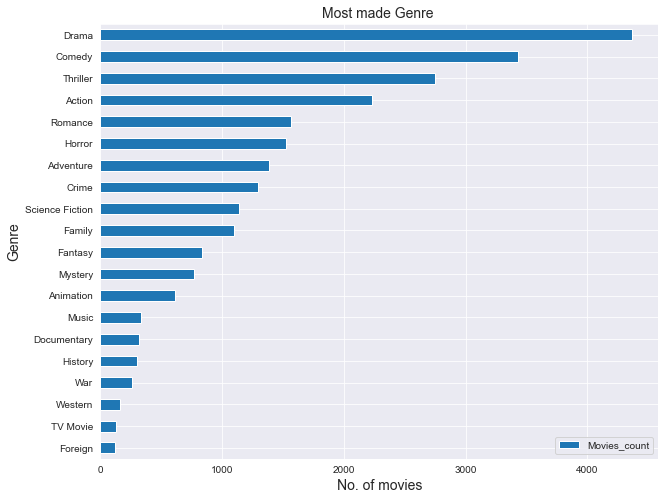

In [33]:
# Plot the Movies count for each genre

df_g.sort_values(['Movies_count'], ascending = False).plot(kind = 'barh',figsize=(10,8));
plt.gca().invert_yaxis()

plt.xlabel('No. of movies', fontsize = 14)
plt.ylabel('Genre', fontsize = 14)
plt.title('Most made Genre ', fontsize = 14)


### Observation.
The genre that is made the most is Drama, followed by Comedy and Thriller. The least made genre is Foreign.
    

### Question 4: Which movie genre is popular?


In [34]:
# get the mean of popularity for each genre

df_popular = df_genres.groupby(['genres'])['popularity'].mean().to_frame(name = 'mean_popular')

In [35]:
df_popular

,mean_popular
genres,
Action,0.968256
Adventure,1.209053
Animation,0.914281
Comedy,0.631565
Crime,0.767337
Documentary,0.217167
Drama,0.625878
Family,0.846467
Fantasy,1.056310


Text(0.5, 1.0, 'Popularity of Genre ')

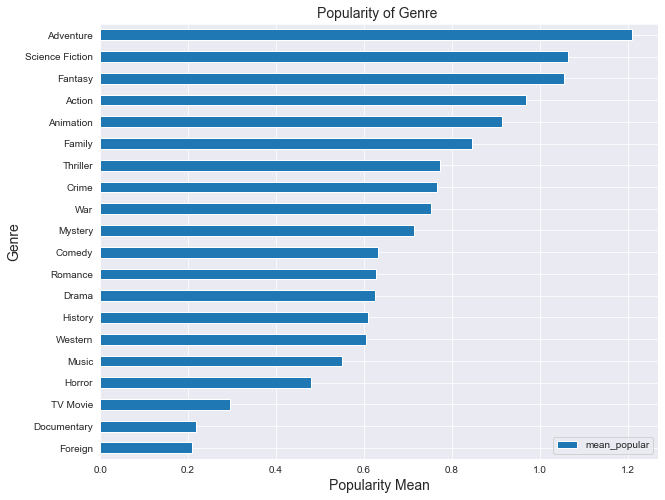

In [36]:
df_popular.sort_values(['mean_popular'], ascending = False).plot(kind = 'barh',figsize=(10,8));
plt.gca().invert_yaxis()

plt.xlabel('Popularity Mean', fontsize = 14)
plt.ylabel('Genre', fontsize = 14)
plt.title('Popularity of Genre ', fontsize = 14)


### Observation.
The genre that is most popular among people is Adventure, followed by Science Fiction and Fantasy.
The least popular genre is the Foreign movies.
Limitation: The genre in itself doesn't make the movie popular. There could be other factors like, cast, director etc

### Research Question 5:   Which Production companies produced highest-grossing movies?


In [37]:
# Get the top 10 highest revenue movies
df_comp_top10 = df.nlargest(10, ['revenue_adj']) 
# get the production companies that produced the above movies
companies = df_comp_top10['production_companies'].to_list()
# Get their revenues.
comp_revenue = df_comp_top10['revenue_adj'].to_list()

In [38]:
print(companies)
comp_revenue

['Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment', 'Lucasfilm|Twentieth Century Fox Film Corporation', 'Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment', 'Warner Bros.|Hoya Productions', 'Universal Pictures|Zanuck/Brown Productions', 'Lucasfilm|Truenorth Productions|Bad Robot', 'Universal Pictures|Amblin Entertainment', 'Columbia Pictures', 'Walt Disney Productions', 'Marvel Studios']


[2827123750.41189,
 2789712242.27745,
 2506405735.41947,
 2167324901.19974,
 1907005841.91576,
 1902723129.80182,
 1791694309.24878,
 1583049536.3524199,
 1574814739.70476,
 1443191435.20607]

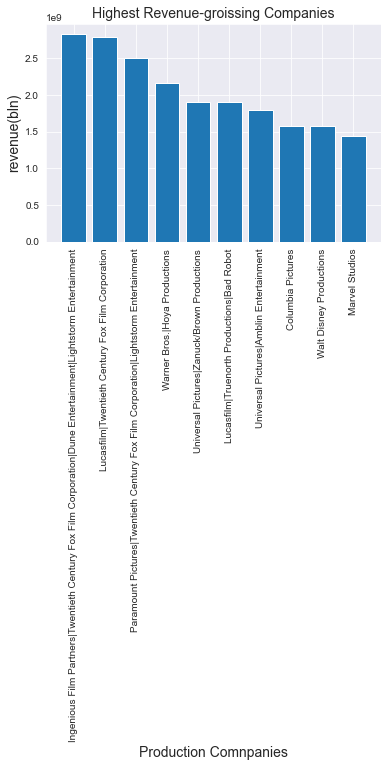

In [39]:
ypos =np.arange(len(companies))
plt.xticks(ypos,companies,rotation= 'vertical')
plt.ylabel('revenue(bln)',fontsize = 14)
plt.xlabel('Production Comnpanies', fontsize = 14)
plt.title('Highest Revenue-groissing Companies',fontsize = 14)
plt.bar(ypos,comp_revenue);

### Observation
Most high-revenue grossing movies are produced by more than one company in partnership.

### Question 6 : Which production companies produced more movies?

In [40]:
# Split the production companies for movies where there are more than one company.Have separate rows for each company.
df_company =df.assign(production_companies = df['production_companies'].str.split('|')).explode('production_companies')
df_company.head(15)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Mandeville Films,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Red Wagon Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [41]:
# Order the top 10 Production Companies by the count of the movies they produced.
df_movie_count  = df_company['production_companies'].value_counts().nlargest(10)
df_movie_count

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      213
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_companies, dtype: int64

In [42]:
top10_comp_movies_count  = df_company['production_companies'].value_counts().nlargest(10).index.tolist()
top10_comp_movies_count

['Universal Pictures',
 'Warner Bros.',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'New Line Cinema',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Touchstone Pictures',
 'Columbia Pictures Corporation']

In [43]:
movies_count = df_movie_count.to_list()
movies_count

[522, 509, 431, 282, 272, 219, 218, 213, 178, 160]

Text(0.5, 1.0, 'Movie counts for Top 10 Production companies')

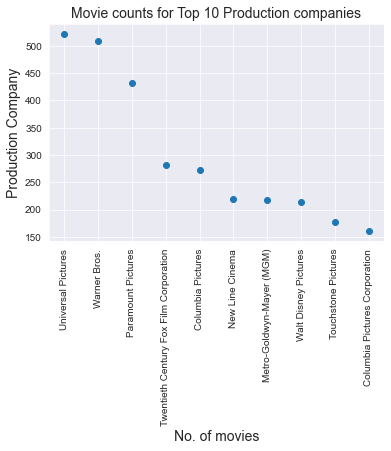

In [45]:
plt.xticks(rotation= 'vertical')
plt.scatter(top10_comp_movies_count,movies_count)

plt.xlabel('No. of movies', fontsize = 14)
plt.ylabel('Production Company', fontsize = 14)
plt.title('Movie counts for Top 10 Production companies', fontsize = 14)


### Observation

The 'Unviversal Pictures' company has produced the most no. of movies followed by Warner Bros and Paramount pictures. 


<a id='conclusions'></a>
## Conclusions

In this report, I have analysed the movies dataset to find the highest grossing movies and to get some insights into the genre and the production company aspects of the movies. Findings are tentative and not verified by the principles of statistics and machine learning.

The finding from my analysis are as follows.

   1.Avatar is the highest grossing movie. This report does not analyse the profitability of movies, taking the budget 
     into account.

   2.The genre that is made the most is Drama. Since the genre of a movie is a mix of more than one kind, we can  
     conclude that most drama movies might also be having other genre elements like adventure, action etc. 

   3.The most popular genre is adventure. This is arrived from the popularity score. Since the genre is a mix of 
     different kinds, we can say that just the 'adventure' aspect did not necessrily make it popular. Other factors 
     like cast, director could also have influenced the popularity.

   4.Universal Pictures has produced the maximum no. of movies.
   
 ## Limitations
 
 Though the heatmap shows the correlation between budget and popularity, it could not confirm how far it is true. Could the vote_average column help with this? It would be nice to know how the values in 'popularity' and 'vote_average' columns are calculated in the dataset.
 
There were more missing values in budget and revenue related columns.I have replaced the missing values with the respective mean values. Since my analysis is mostly based on these columns,its likely that my results are distorted. 

Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.


### Reference Websites.

https://pandas.pydata.org 

https://stackoverflow.com

https://github.com

https://www.geeksforgeeks.org
